In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
samp_rate = 1e7

In [156]:
def plot_waveform(amp, phase):
    time = np.linspace(0, len(amp)/samp_rate, len(amp)) * 1e6
    freq = np.diff(phase, prepend=phase[0])*samp_rate / (2*np.pi) * 1e-3

    (fig, ax1) = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(time, amp)
    ax2.plot(time, freq, color='C1')
    ax1.set_xlabel('Time (us)')
    ax1.set_ylabel('Relative amplitude')
    ax2.set_ylabel('Frequency (kHz)')
    plt.show()

In [157]:
def linear_spinup__adiabatic_release(start_phase, start_hold, spinup_time, middle_hold, release_time, final_drive_freq):
    final_drive_angular_freq = 2*np.pi * final_drive_freq

    # Reference times (labelled by the time at which a section begins, NOT by the duration of that section)
    t_spinup = start_hold
    t_middle = start_hold + spinup_time
    t_release = start_hold + spinup_time + middle_hold

    # Time array   
    total_time = start_hold + spinup_time + middle_hold + release_time
    t = np.linspace(0, total_time, int(samp_rate * total_time))
    
    # Reference regions
    spinup_region = (t >= t_spinup) & (t < t_middle)
    middle_region = (t >= t_middle) & (t < t_release)
    release_region = (t >= t_release)

    # Amplitude curve
    amplitude_curve = np.ones_like(t)
    amplitude_curve[release_region] = 1.0 / (1 + 30.6*(t[release_region] - t_release)/release_time)**2

    spinup_end_phase = start_phase + final_drive_angular_freq*spinup_time/2
    middle_end_phase = spinup_end_phase + final_drive_angular_freq*middle_hold

    # Phase curve
    phase_curve = start_phase * np.ones_like(t)
    phase_curve[spinup_region] = start_phase + final_drive_angular_freq/(2*spinup_time)*(t[spinup_region] - start_hold)**2
    phase_curve[middle_region] = spinup_end_phase + final_drive_angular_freq * (t[middle_region] - t_middle)
    phase_curve[release_region] = middle_end_phase + final_drive_angular_freq * (t[release_region] - t_release)
    
    return amplitude_curve, phase_curve


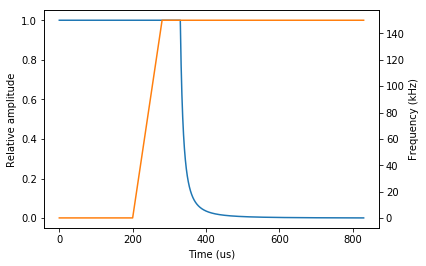

In [165]:
(amp, phase) = linear_spinup__adiabatic_release(0, 0.2e-3, 80e-6, 50e-6, 500e-6, 150e3)
plot_waveform(amp, phase)